# ANÁLISIS DE BIWENGER

Este código obtiene los datos de los jugadores de la web de Biwenger y analiza los jugadores por rango de precio, las posibilidades de obtener a un jugador de un rango de precio determinado en un sobre, y el porcentaje de titularidad de los jugadores desde la web FutbolFantasy

## Obtención de los datos de Biwenger

In [2]:
import requests
import csv
import pandas as pd

#Obtenemos el Json de Biwenger

r = requests.get(
    "https://cf.biwenger.com/api/v2/competitions/la-liga/data?lang=en&score=1").json()

#Extraemos los datos de los jugadores

data = []
for k, v in r['data']['players'].items():
    data.append(v)

with open('output.csv', 'w', newline="", encoding="UTF-8") as f:
    writer = csv.writer(f)
    writer.writerow(v.keys())
    writer.writerows(data)

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,id,name,slug,teamID,position,price,fantasyPrice,status,priceIncrement,playedHome,playedAway,fitness,points,pointsHome,pointsAway,pointsLastSeason,statusInfo
0,12215,Alejandro Cantero,a-cantero,10.0,4,150000,7000000,ok,0,1,1,"[6, -2, None, None, None]",4,-2,6,NaN,NaN
1,17731,Catena,a-catena,70.0,2,2540000,11000000,ok,30000,1,2,"[6, 2, 6, None, None]",14,6,8,NaN,NaN
2,16606,Aitor Fernández,a-fernandez,10.0,1,3000000,20000000,ok,-20000,1,1,"[sanctioned, -4, 2, None, None]",-2,-4,2,118.0,NaN
3,15462,Gorosabel,a-gorosabel,13.0,2,2870000,15000000,ok,10000,2,1,"[6, 2, 2, None, None]",10,8,2,128.0,NaN
4,2224,Antonio Sánchez,a-sanchez,465.0,3,150000,8000000,injured,0,0,0,"[injured, injured, injured, None, None]",0,0,0,NaN,Shoulder problems
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,1074,Yuri,yuri-berchiche,1.0,2,790000,18000000,injured,-10000,0,0,"[injured, injured, injured, None, None]",0,0,0,81.0,Operación por una pubalgia.
559,23041,Demir,yusuf-demir,3.0,3,1080000,7000000,ok,-70000,0,1,"[None, 2, None, None, None]",2,0,2,NaN,NaN
560,1800,Zaldua,zaldua,13.0,2,370000,12000000,ok,0,1,1,"[0, None, 2, None, None]",2,0,2,30.0,NaN
561,8376,Zubeldia,zubeldia,13.0,3,1180000,18000000,ok,-20000,0,0,"[None, doubt, doubt, None, None]",0,0,0,92.0,NaN


## Cálculo del número de jugadores en un rango de precios

In [5]:
n_players = df['price'].count()

In [6]:
precios = list(df['price'])

In [7]:
def rango_precios(a,b,precios):
    count = 0
    for i in range (len(precios)):
        if precios[i]>=a and precios[i]<=b:
            count = count + 1
    porcentaje = (count/len(precios))*100
    return (count)
    

In [8]:
porcentaje = rango_precios(8000000,10000000,precios)
print('El porcentaje de jugadores en el intervalo es de :', porcentaje, '%')

El porcentaje de jugadores en el intervalo es de : 10 %


## Histograma del número de jugadores por un precio

Text(0, 0.5, 'Jugadores')

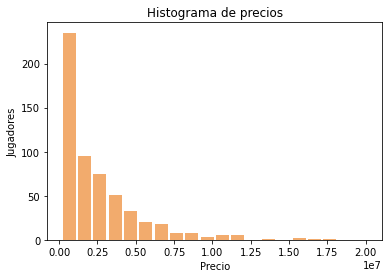

In [9]:
import matplotlib.pyplot as mp
intervalos = range(min(precios),max(precios),1000000)
mp.hist(x=precios, bins=intervalos, color='#F2AB6D', rwidth=0.85)
mp.title('Histograma de precios')
mp.xlabel('Precio')
mp.ylabel('Jugadores')

## TOP 10 Jugadores con mayor subida de valor

In [10]:
delta_max=[]
player_delta=[]
for i in range (len(df['priceIncrement'])):
    if df['priceIncrement'][i]>100000:
        delta_max.append(df['priceIncrement'][i])
        player_delta.append(df['name'][i])
        
price_var = dict(zip(player_delta,delta_max))

In [11]:
import operator
price_var = sorted(price_var.items(), key=operator.itemgetter(1))
price_var

[('Dani Rodríguez', 110000),
 ('Iñigo Martínez', 110000),
 ('Marcos André', 110000),
 ('Randy Nteka', 110000),
 ('Barrenetxea', 120000),
 ('Carvajal', 120000),
 ('Erik Lamela', 130000),
 ('Guedes', 130000),
 ('Memphis Depay', 130000),
 ('Dani Vivian', 140000),
 ('Fer Niño', 150000),
 ('Mojica', 150000),
 ('Sancet', 150000),
 ('Soler', 170000),
 ('A. Correa', 170000),
 ('Willian José', 170000),
 ('Vinícius Jr', 220000)]

## CÁLCULO PROBABILIDADES SOBRES

 Estos códigos calculan la probabilidad de obtener un jugador de un rango de precio determinado al comprar los diferentes tipos de sobres. PSe obtiene el vector probabilidad teniendo solo en cuenta los jugadores en el rango del sobre.

## Probabilidades de un Sobre Bronce

In [12]:
probability = []
rango = []
n=0
p=0
bronze_players = rango_precios(0,5000000,precios)
for i in range (1000000,5000001,1000000):
    z = str(i-1e6) + ' - ' + str(i)
    rango.append(z)
    n = rango_precios(i-1000000,i,precios)
    p = (n/bronze_players)*100
    probability.append(p)

probabilidad = dict(zip(rango,probability))

for key,value in probabilidad.items():
    print (key,' : ',value, '%')

0.0 - 1000000  :  44.14784394250513 %
1000000.0 - 2000000  :  20.944558521560573 %
2000000.0 - 3000000  :  16.2217659137577 %
3000000.0 - 4000000  :  13.347022587268995 %
4000000.0 - 5000000  :  6.981519507186857 %


## Probabilidades de un Sobre Plata

In [12]:
probability = []
rango = []
n=0
p=0
silver_players = rango_precios(5000000,10000000,precios)
for i in range (6000000,10000001,1000000):
    z = str(i-1e6) + ' - ' + str(i)
    rango.append(z)
    n = rango_precios(i-1000000,i,precios)
    p = (n/silver_players)*100
    probability.append(p)
    
invest_recover = probability[3]+probability[4]
print ('Las posibilidades de ganar dinero con el sobre son de: ',invest_recover)
probabilidad = dict(zip(rango,probability))

for key,value in probabilidad.items():
    print (key,' : ',value, '%')

Las posibilidades de ganar dinero con el sobre son de:  18.333333333333332
5000000.0 - 6000000  :  33.33333333333333
6000000.0 - 7000000  :  33.33333333333333
7000000.0 - 8000000  :  16.666666666666664
8000000.0 - 9000000  :  11.666666666666666
9000000.0 - 10000000  :  6.666666666666667


In [13]:
probability

[33.33333333333333,
 33.33333333333333,
 16.666666666666664,
 11.666666666666666,
 6.666666666666667]

## Probabilidades Sobre Oro

In [14]:
probability = []
n=0
p=0
gold_players = rango_precios(10000000,30000000,precios)
for i in range (10000000,30000001,1000000):
    z = str(i-1e6) + ' - ' + str(i)
    rango.append(z)
    n = rango_precios(i-1000000,i,precios)
    p = (n/gold_players)*100
    probability.append(p)

probabilidad = dict(zip(rango,probability))

for key,value in probabilidad.items():
    print (key,' : ',value, '%')

5000000.0 - 6000000  :  23.52941176470588
6000000.0 - 7000000  :  17.647058823529413
7000000.0 - 8000000  :  41.17647058823529
8000000.0 - 9000000  :  5.88235294117647
9000000.0 - 10000000  :  0.0
10000000.0 - 11000000  :  11.76470588235294
11000000.0 - 12000000  :  0.0
12000000.0 - 13000000  :  11.76470588235294
13000000.0 - 14000000  :  0.0
14000000.0 - 15000000  :  0.0
15000000.0 - 16000000  :  5.88235294117647
16000000.0 - 17000000  :  0.0
17000000.0 - 18000000  :  0.0
18000000.0 - 19000000  :  0.0
19000000.0 - 20000000  :  0.0
20000000.0 - 21000000  :  0.0
21000000.0 - 22000000  :  0.0
22000000.0 - 23000000  :  0.0
23000000.0 - 24000000  :  0.0
24000000.0 - 25000000  :  0.0


## BUSCAR JUGADORES TITULARES

In [15]:
from bs4 import BeautifulSoup
import urllib
import re

url = 'https://www.futbolfantasy.com/'
html = urllib.request.urlopen(url)
soup = BeautifulSoup(html)
teams = soup('a',class_ ='team')
Equipos = []
for team in teams:
    alt = team.get('alt')
    if alt not in Equipos:
        Equipos.append(alt)

### START THE CRAWLER ###

links=[]
for team in teams:
    link = team.get('href')
    if link not in links:
        links.append(link)


titulares_equipos=[]
for url2 in links:
    html2 = urllib.request.urlopen(url2)
    soup2 = BeautifulSoup(html2)
    equipo = soup2('span', class_='nombre')
    equipo = re.findall('(?<=>).*(?=<)',str(equipo))
    jug = soup2('a', class_='juggador')
    datos_jug=[]
    for i in jug:
        datos_jug.append(i.contents)
        p = re.findall('\d\d%',str(i.contents))
        n = re.findall('(?<=>).*(?=<)',str(i.contents))
        if p != []:
            z = [n[0],p[0],equipo[0]]
            titulares_equipos.append(z)
    


In [16]:
titulares_equipos

[['Pacheco', '95%', 'Alavés'],
 ['R. Duarte', '80%', 'Alavés'],
 ['Javi López', '20%', 'Alavés'],
 ['Joselu', '95%', 'Alavés'],
 ['Rioja', '60%', 'Alavés'],
 ['Sylla', '20%', 'Alavés'],
 ['Iván Martín', '20%', 'Alavés'],
 ['Édgar', '60%', 'Alavés'],
 ['Pellistri', '40%', 'Alavés'],
 ['Lejeune', '95%', 'Alavés'],
 ['Pina', '90%', 'Alavés'],
 ['Toni Moya', '10%', 'Alavés'],
 ['Manu García', '95%', 'Alavés'],
 ['Ximo', '80%', 'Alavés'],
 ['Martín A.', '20%', 'Alavés'],
 ['Miazga', '50%', 'Alavés'],
 ['Laguardia', '50%', 'Alavés'],
 ['Pere Pons', '60%', 'Alavés'],
 ['Loum', '40%', 'Alavés'],
 ['Pacheco', '95%', 'Alavés'],
 ['Manu García', '80%', 'Alavés'],
 ['Lejeune', '90%', 'Alavés'],
 ['Joselu', '80%', 'Alavés'],
 ['Pellistri', '50%', 'Alavés'],
 ['Rioja', '60%', 'Alavés'],
 ['Miazga', '60%', 'Alavés'],
 ['Pina', '80%', 'Alavés'],
 ['R. Duarte', '80%', 'Alavés'],
 ['Pere Pons', '60%', 'Alavés'],
 ['Ximo', '70%', 'Alavés'],
 ['Toni Moya', '10%', 'Alavés'],
 ['Tachi', '10%', 'Alavés'],
 [

In [17]:
df_ff = pd.DataFrame(titulares_equipos,columns=['name','Titularidad','Equipo'])

In [18]:
df_ff

,name,Titularidad,Equipo
0,Pacheco,95%,Alavés
1,R. Duarte,80%,Alavés
2,Javi López,20%,Alavés
3,Joselu,95%,Alavés
4,Rioja,60%,Alavés
...,...,...,...
792,Mandi,10%,Villarreal
793,Estupiñán,40%,Villarreal
794,Coquelin,20%,Villarreal
795,Alcácer,25%,Villarreal
